# Bank Marketing Project 

dataset source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('bank_marketing_train.csv', sep=';')
test_df = pd.read_csv('bank_marketing_test.csv', sep=';')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


The train file holds 90% of the data and the test file holds the other 10%. I think that ratio is a little too high and an 80/20  split would be better. Subsequently, I'm going to concatenate these two files and then perform a new train-test split.

In [7]:
rejoined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
rejoined_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### Tidying up the datetime columns and performing the train-test-split

Before doing a train-test-split, I'd like to be able to see how the date columns work on a year-level. To that end, I'll convert them to a 'month-day' datetime column, which I can do here before the train-test-split without producing any data leakage.

In [8]:
#Making sure the 'month' column is exhaustive 
rejoined_df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [9]:
#converting the 'month' column to a datetime-conversion-friendly format
month_abbr_to_num = {
    "jan": '01',
    "feb": '02',
    "mar": '03',
    "apr": '04',
    "may": '05',
    "jun": '06',
    "jul": '07',
    "aug": '08',
    "sep": '09',
    "oct": '10',
    "nov": '11',
    "dec": '12',
}
rejoined_df['month'] = rejoined_df['month'].map(month_abbr_to_num)
rejoined_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,05,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,05,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,05,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,05,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,05,198,1,-1,0,unknown,no


In [10]:
#First converting the 'day' column to a string column
rejoined_df['str_day'] = rejoined_df['day'].apply(str)

In [11]:
#Now adding in the leading zeroes before converting to datetime
# since Python wouldn't allow it when they were integers
leading_zeroes_dict = {
    '1': '01',
    '2': '02',
    '3': '03',
    '4': '04',
    '5': '05',
    '6': '06',
    '7': '07',
    '8': '08',
    '9': '09',
}
rejoined_df['str_day'] = rejoined_df['str_day'].map(leading_zeroes_dict).fillna(rejoined_df['str_day'])
#Making sure it worked
rejoined_df['str_day'].unique()

array(['05', '06', '07', '08', '09', '12', '13', '14', '15', '16', '19',
       '20', '21', '23', '26', '27', '28', '29', '30', '02', '03', '04',
       '11', '17', '18', '24', '25', '01', '10', '22', '31'], dtype=object)

In [12]:
#creating a 'month-day' column that will better help keep track of annual trends
#rejoined_df['month-day'] = rejoined_df['month'] + '-' + rejoined_df['day']
rejoined_df['month-day'] = rejoined_df['month'] + rejoined_df['str_day']
rejoined_df['month-day'] = pd.to_datetime(rejoined_df['month-day'], format='%m%d')
rejoined_df['month-day'] = rejoined_df['month-day'].dt.strftime('%m-%d')
#dropping the now-unnecessary 'str_day' column
rejoined_df.drop('str_day', axis=1, inplace=True)
#converting the original 'month' and 'day' columns back into integers:
rejoined_df['month'] = rejoined_df['month'].apply(int)
rejoined_df['day'] = rejoined_df['day'].apply(int)
rejoined_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,month-day
10515,52,unemployed,married,secondary,no,0,no,no,unknown,16,6,18,7,-1,0,unknown,no,06-16
44162,31,technician,married,tertiary,no,2166,no,no,cellular,13,7,577,6,182,2,success,yes,07-13
26978,39,blue-collar,single,secondary,no,4619,no,no,cellular,21,11,104,1,-1,0,unknown,no,11-21
45444,45,blue-collar,single,secondary,no,0,yes,no,cellular,26,7,768,2,91,5,success,no,07-26
37404,44,management,married,tertiary,no,12392,yes,no,cellular,13,5,177,3,343,1,other,no,05-13
30516,41,unemployed,married,primary,no,4112,no,no,cellular,5,2,764,2,-1,0,unknown,no,02-05
21111,46,blue-collar,married,primary,no,2118,no,no,telephone,14,8,64,2,-1,0,unknown,no,08-14
15971,32,technician,single,tertiary,no,259,no,no,cellular,22,7,407,4,-1,0,unknown,no,07-22
20768,54,blue-collar,married,secondary,no,3002,no,no,cellular,13,8,110,4,-1,0,unknown,no,08-13
2698,31,services,single,secondary,no,516,yes,no,unknown,13,5,271,2,-1,0,unknown,no,05-13


In [13]:
#Now to train-test-split with a larger test size than the original dataset files had
X = rejoined_df.drop('y', axis=1)
y = rejoined_df['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=713)

In [14]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,month-day
22065,51,housemaid,married,primary,no,3486,no,no,cellular,20,8,135,11,-1,0,unknown,08-20
23946,54,blue-collar,married,secondary,no,466,no,no,cellular,29,8,436,4,-1,0,unknown,08-29
14232,35,blue-collar,married,secondary,no,1287,yes,no,cellular,14,7,330,2,-1,0,unknown,07-14
15211,50,blue-collar,married,secondary,no,19,no,no,cellular,17,7,209,4,-1,0,unknown,07-17
24198,34,technician,single,secondary,no,105,yes,no,cellular,17,11,303,1,196,2,failure,11-17


## Understanding each feature

Some columns are self-explanatory (age, job, marital status, education level, best way to contact, and the target ('y'). Others are not as straightforward, so let's consult the data dictionary [found with the dataset here](https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets/data):

**basic client information:**
- 'default' shows whether they've defaulted on credit before
- 'balance' refers to the average yearly account balance
- 'housing' (yes/no) shows whether they have a housing loan
- 'loan' (yes/no) shows whether they have a personal loan

**current marketing campaign data:**
- 'day', 'month', and 'duration' refer to the last time the bank contacted the client via phone in terms of the day of the month, the month, and the duration of that last call in seconds. 
- 'campaign' refers to the 'number of contacts performed during this campaign and for this client' and this 'includes the last contact'

**previous campaign data:**
- 'pdays' refers to the 'number of days that passed by after the client was last contacted from a previous campaign' and '-1 means client was not previously contacted'
- 'previous' refers to the 'number of contacts performed before this campaign and for this client'
- 'poutcome' refers to the 'outcome of the previous marketing campaign'

In [15]:
X_train_continuous = X_train[['age', 'balance', 'campaign', 'pdays', 'previous']]

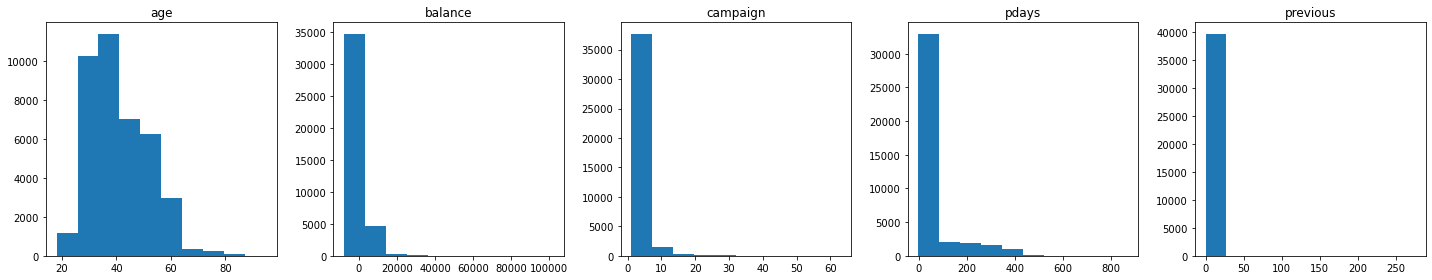

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,4))
for index, col in enumerate(X_train_continuous):
    axes[index].hist(X_train_continuous[col])
    axes[index].set_title(X_train_continuous.columns[index])
plt.tight_layout();

Before I examine the categorical columns, the date information is kind of in a grey area. Let's check out how the months look:

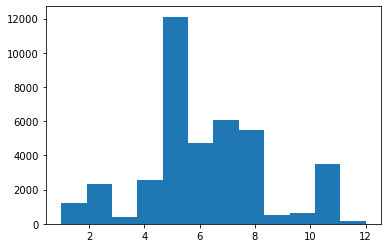

In [17]:
plt.hist(X_train['month'], bins=12);

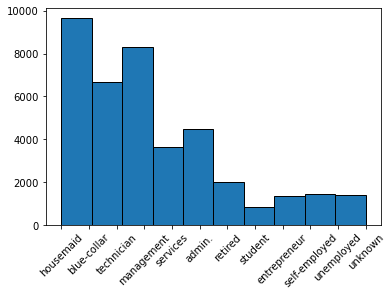

In [18]:
plt.hist(X_train['job'], edgecolor='black')
plt.xticks(rotation=45);

Now let's see how the other categorical columns look. This graph may be a little hard to read in detail, but for now, I'm just looking to see the general distribution of each column, not the details.

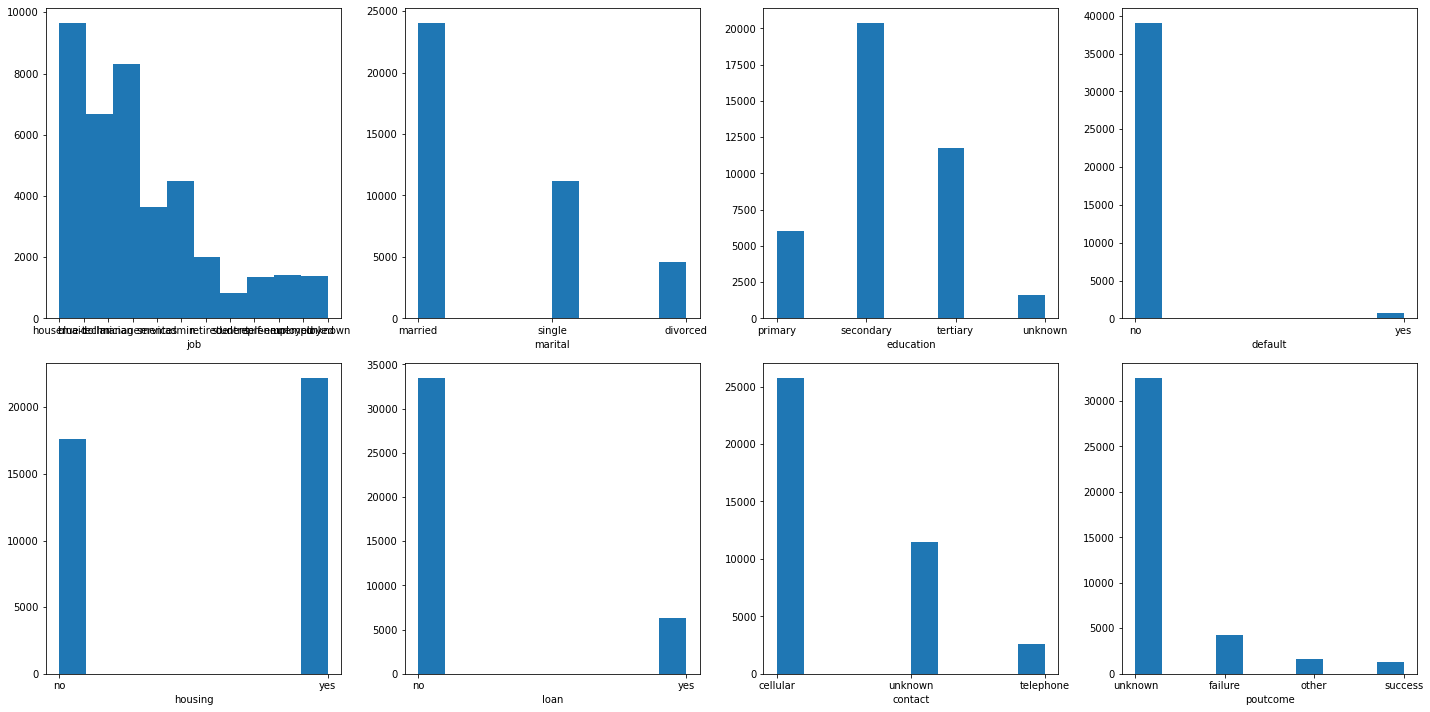

In [19]:
X_train_categorical = X_train[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
for i, column in enumerate(X_train_categorical.columns):
    row = i//4
    col = i%4
    ax = axes[row][col]
#    ax.hist(column, density=True)
#    ax.hist(column, bins='auto')
    ax.hist(X_train[column])
    ax.set_xlabel(column)
plt.tight_layout();

So, when it comes to issue of entropy, it looks like the 'default' and 'loan' columns would make the best case for earlier splits in a decision tree, with 'poutcome' next, then probably 'marital', 'contact', and 'education' won't be too far behind, then 'job' and 'housing' round out the end of the line. Of course, we won't know until we run a decision tree model. 

Ok, I'm not 100% sure about the best way to proceed from here. Looking through my notes, I think a decision tree is the best way to go right now and then, if we want to "exceed objectives" later, we can try a scikit-learn or StatsModels classification model later. But ultimately, I don't how else I'd find out which attributes correlate best outside of a decision tree. 

I know decision trees are all about how you set them up, pruning, and hyperparameters. To that end, maybe our "baseline" here is a "vanilla" model where we don't do any of that stuff first.

I mean, can I do a correlation matrix with these? Like, convert all the categoricals via ohe and then run a LogisticRegression model? Maybe so.

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [21]:
#one-hot encoding the categorical columns
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(X_train.columns))
#instantiating & fitting the DecisionTreeClassifier model
clf = DecisionTreeClassifier(criterion='entropy', random_state=713)
clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=713)

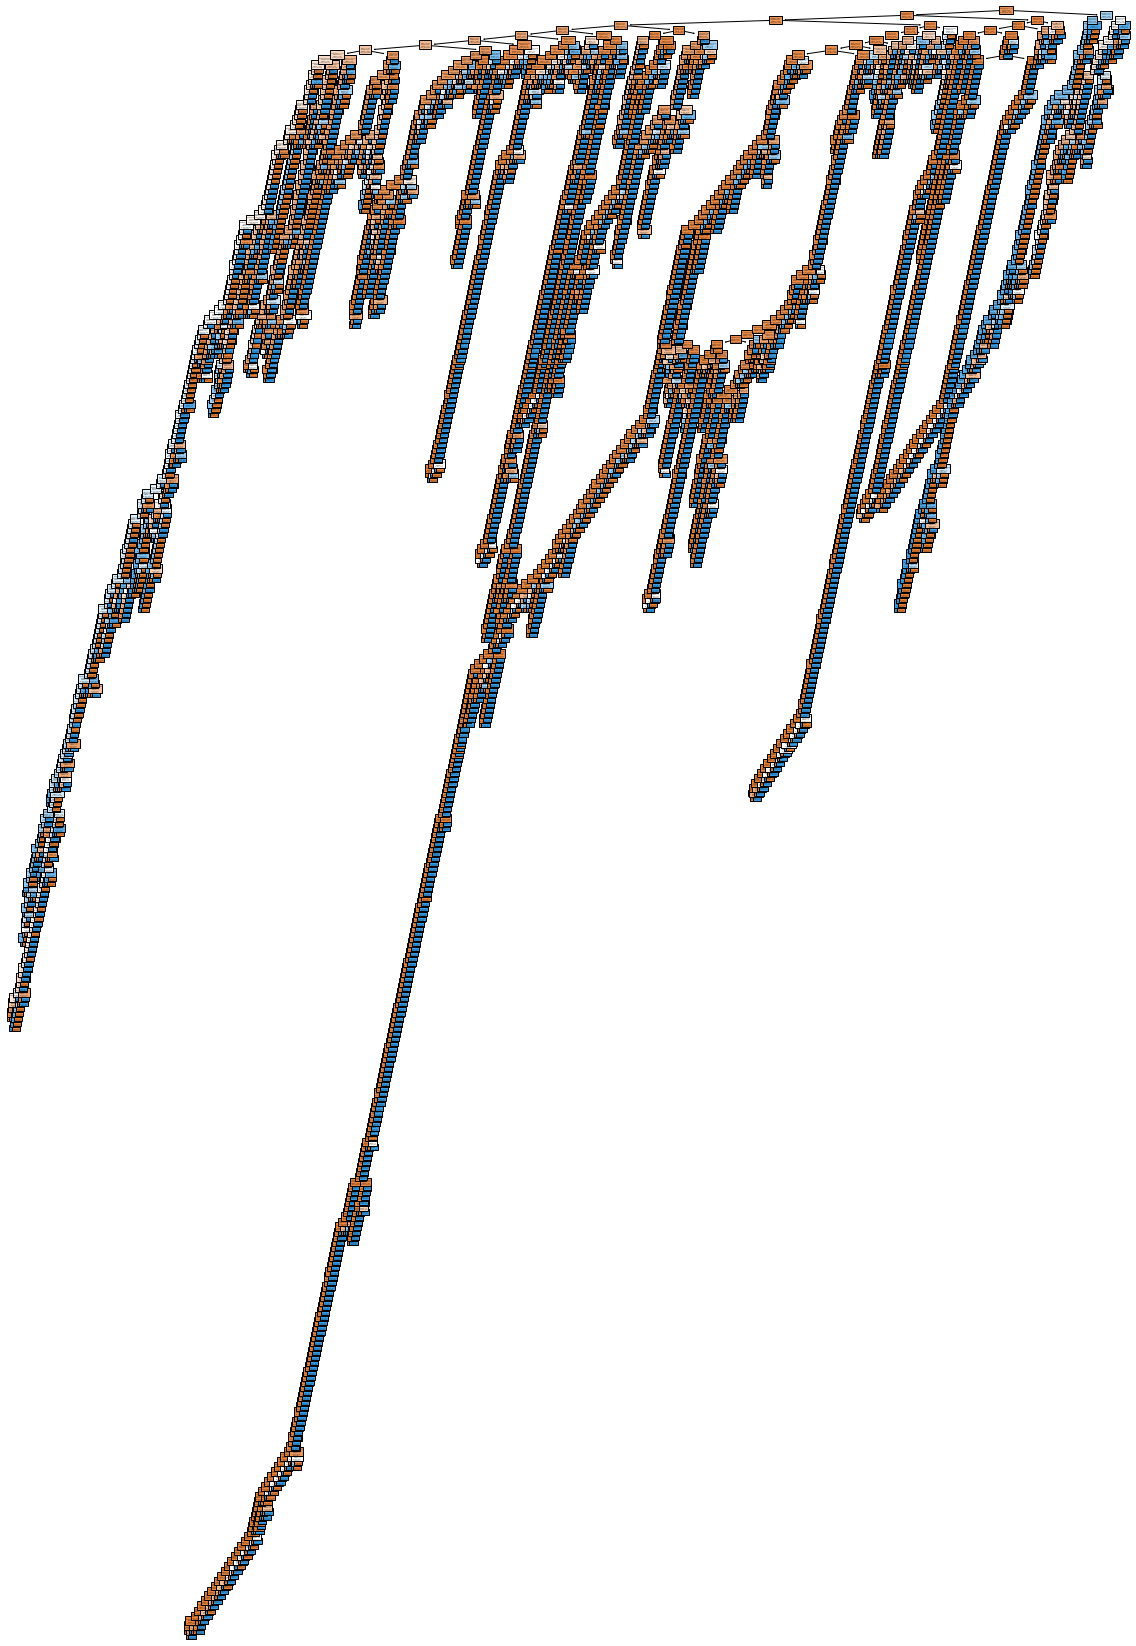

In [22]:
fig, ax = plt.subplots(figsize=(20,30))
tree.plot_tree(clf,
              feature_names = ohe_df.columns,
              class_names = np.unique(y).astype('str'),
              filled=True)
plt.show();

In [23]:
#Wow, what a monstrosity. We'll definitely need to prune this tree. 
#Let's evaluate with accuracy for now, just to see and get a feel for what's going on:
X_test_ohe = ohe.transform(X_test)
y_pred_test = clf.predict(X_test_ohe)
print('accuracy:', accuracy_score(y_test, y_pred_test))

accuracy: 0.8898160249321403
